In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
path = 'C:\\Users\\rhasan\\Downloads\\Tensorflow-Bootcamp\\05-Autoencoders\\anonymized_data.csv'

In [4]:
df = pd.read_csv(path)

In [5]:
df.head()

,EJWY,VALM,EGXO,HTGR,SKRF,NNSZ,NYLC,GWID,TVUT,CJHI,...,LKKS,UOBF,VBHE,FRWU,NDYZ,QSBO,JDUB,TEVK,EZTM,Label
0,-2.032145,1.019576,-9.658715,-6.210495,3.156823,7.457850,-5.313357,8.508296,3.959194,-5.246654,...,-2.209663,-10.340123,-7.697555,-5.932752,10.872688,0.081321,1.276316,5.281225,-0.516447,0.0
1,8.306217,6.649376,-0.960333,-4.094799,8.738965,-3.458797,7.016800,6.692765,0.898264,9.337643,...,0.851793,-9.678324,-6.071795,1.428194,-8.082792,-0.557089,-7.817282,-8.686722,-6.953100,1.0
2,6.570842,6.985462,-1.842621,-1.569599,10.039339,-3.623026,8.957619,7.577283,1.541255,7.161509,...,1.376085,-8.971164,-5.302191,2.898965,-8.746597,-0.520888,-7.350999,-8.925501,-7.051179,1.0
3,-1.139972,0.579422,-9.526530,-5.744928,4.834355,5.907235,-4.804137,6.798810,5.403670,-7.642857,...,0.270571,-8.640988,-8.105419,-5.079015,9.351282,0.641759,1.898083,3.904671,1.453499,0.0
4,-1.738104,0.234729,-11.558768,-7.181332,4.189626,7.765274,-2.189083,7.239925,3.135602,-6.211390,...,-0.013973,-9.437110,-6.475267,-5.708377,9.623080,1.802899,1.903705,4.188442,1.522362,0.0


In [6]:
df.columns

Index(['EJWY', 'VALM', 'EGXO', 'HTGR', 'SKRF', 'NNSZ', 'NYLC', 'GWID', 'TVUT',
       'CJHI', 'NVFW', 'VLBG', 'IDIX', 'UVHN', 'IWOT', 'LEMB', 'QMYY', 'XDGR',
       'ODZS', 'LNJS', 'WDRT', 'LKKS', 'UOBF', 'VBHE', 'FRWU', 'NDYZ', 'QSBO',
       'JDUB', 'TEVK', 'EZTM', 'Label'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 31 columns):
EJWY     500 non-null float64
VALM     500 non-null float64
EGXO     500 non-null float64
HTGR     500 non-null float64
SKRF     500 non-null float64
NNSZ     500 non-null float64
NYLC     500 non-null float64
GWID     500 non-null float64
TVUT     500 non-null float64
CJHI     500 non-null float64
NVFW     500 non-null float64
VLBG     500 non-null float64
IDIX     500 non-null float64
UVHN     500 non-null float64
IWOT     500 non-null float64
LEMB     500 non-null float64
QMYY     500 non-null float64
XDGR     500 non-null float64
ODZS     500 non-null float64
LNJS     500 non-null float64
WDRT     500 non-null float64
LKKS     500 non-null float64
UOBF     500 non-null float64
VBHE     500 non-null float64
FRWU     500 non-null float64
NDYZ     500 non-null float64
QSBO     500 non-null float64
JDUB     500 non-null float64
TEVK     500 non-null float64
EZTM     500 non-null flo

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler()

In [10]:
feature = df.drop('Label', axis=1)

In [11]:
label = df['Label']

In [12]:
scaled_data = scaler.fit_transform(feature)

In [13]:
scaled_data

array([[ 0.        ,  0.26590249,  0.19337622, ...,  0.76146479,
         0.89187148,  0.69449859],
       [ 0.78003243,  0.82101815,  0.86384145, ...,  0.13118915,
         0.14173837,  0.18919308],
       [ 0.64909787,  0.85415725,  0.79583534, ...,  0.16350718,
         0.12891497,  0.18149351],
       ..., 
       [ 0.98154196,  0.64205789,  0.74518214, ...,  0.04904853,
         0.06277868,  0.23240366],
       [ 0.74388166,  0.86176345,  0.75260151, ...,  0.19478426,
         0.03890874,  0.22364704],
       [ 0.77871175,  0.78883203,  0.78611589, ...,  0.17766076,
         0.08887577,  0.22545067]])

In [15]:
label.head()

0    0.0
1    1.0
2    1.0
3    0.0
4    0.0
Name: Label, dtype: float64

In [16]:
#Linear Autoencoder 
import tensorflow as tf

In [17]:
from tensorflow.contrib.layers import fully_connected

In [18]:
#parameters 
learning_rate = 0.01

num_inputs = 30
num_hidden = 2
num_outputs = num_inputs

In [19]:
#Placeholder
X = tf.placeholder(tf.float32, shape=[None,num_inputs])

In [20]:
hidden = fully_connected(X, num_hidden, activation_fn=None)

In [21]:
output = fully_connected(hidden, num_outputs, activation_fn=None)

In [22]:
loss = tf.reduce_mean(tf.square(output - X))

In [23]:
optimizer = tf.train.AdamOptimizer(learning_rate)

In [24]:
train = optimizer.minimize(loss)

In [25]:
init = tf.global_variables_initializer()

In [42]:
#Session
num_steps = 1500

with tf.Session() as sess:
    sess.run(init)
    
    for iteration in range(num_steps):
        sess.run(train,feed_dict={X: scaled_data})

In [43]:
with tf.Session() as sess:
    sess.run(init)
    
    output_2d = hidden.eval(feed_dict={X: scaled_data})

In [44]:
output_2d

array([[ 0.77920961,  0.75192678],
       [ 0.19908096, -0.39986262],
       [ 0.43773496, -0.35261965],
       [ 0.91478711,  1.01703668],
       [ 0.74297446,  0.75671256],
       [ 0.12700479, -0.42252991],
       [ 0.43010259, -0.64973265],
       [ 0.43353915, -0.29932407],
       [ 0.92161971,  1.06591356],
       [ 0.86908036,  0.50808185],
       [ 0.89375025,  0.98075032],
       [ 0.4491747 , -0.64540285],
       [ 0.05382385, -0.40987331],
       [ 0.83283937,  0.91524321],
       [-0.06745519, -0.34351358],
       [ 1.04601204,  0.75044352],
       [ 0.16568385, -0.52305365],
       [ 0.70624197,  0.96860784],
       [ 0.07318316, -0.45580691],
       [ 0.23744458, -0.71219254],
       [ 0.35971507, -0.80435693],
       [ 0.76212376,  0.48469034],
       [ 0.37434223, -0.21727324],
       [ 1.07809162,  0.90065259],
       [ 0.58513093,  1.10774434],
       [ 0.89587724,  1.18229222],
       [ 1.21544814,  1.02168727],
       [ 0.03110421, -0.56561774],
       [ 0.77369374,

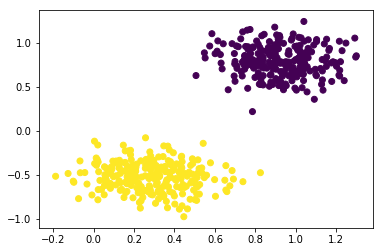

In [45]:
plt.scatter(output_2d[:,0], output_2d[:,1], c=df['Label'])

## Stacked Autoencoder

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [47]:
import tensorflow as tf

In [48]:
from tensorflow.examples.tutorials.mnist import input_data

In [49]:
mnist = input_data.read_data_sets("C:\\Users\\rhasan\\Downloads\\Tensorflow-Bootcamp\\03-Convolutional-Neural-Networks\\", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting C:\Users\rhasan\Downloads\Tensorflow-Bootcamp\03-Convolutional-Neural-Networks\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting C:\Users\rhasan\Downloads\Tensorflow-Bootcamp\03-Convolutional-Neural-Networks\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting C:\Users\rhasan\Downloads\Tensorflow-Bootcamp\03-Convolutional-Neural-Networks\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting C:\Users\rhasan\Downloads\Tensorflow-Bootcamp\03-Convolutional-Neural-Networks\t10k-labels-idx1-ubyte.gz


In [50]:
tf.reset_default_graph()

In [51]:
#parameters

learning_rate = 0.01

num_inputs = 784
neurons_hid1 = 392
neurons_hid2 = 196
neurons_hid3 = neurons_hid1
num_outputs = num_inputs 

In [52]:
act_func = tf.nn.relu